In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import stft, blackman, hann, chirp, istft
from math import inf, pi
import scipy.io.wavfile as wav
import pandas as pd
from sklearn.decomposition import FastICA, PCA

In [3]:
fs, audio = wav.read('Degussy - Etude pour les huit doigts.wav')


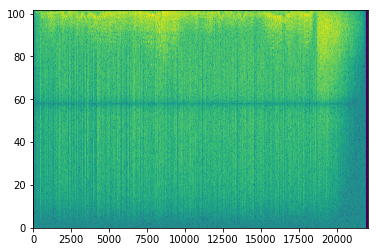

In [4]:
wlen = 512
win = hann(wlen)
nfft = 1024
f, t, Sxx = stft(audio, fs, win, wlen, wlen/2, nfft)
plt.imshow(20*np.log10(abs(Sxx) + 1e-6), extent=[f.min(), f.max(), t.min(), t.max()], aspect='auto')

In [14]:
ica = FastICA(n_components=2)
S_ = ica.fit_transform(np.transpose(20*np.log10(abs(Sxx) + 1e-6)))  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix



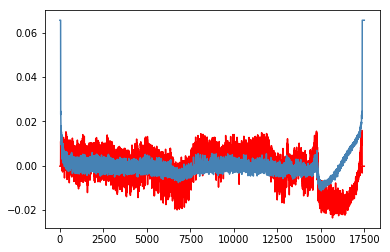

In [15]:

colors = ['red', 'steelblue', 'orange']
for sig, color in zip(S_.T, colors):
        plt.plot(sig, color=color)

In [18]:
t, x = istft(S_.T[0], fs, win, wlen, wlen/2, nfft)

ValueError: Input stft must be at least 2d!

In [17]:
from scipy import signal
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [19]:
X.shape

(2000, 3)